In [1]:
# Add the libraies path to python
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..\\python\\database'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\plots'))
sys.path.append(os.path.join(os.getcwd(), '..\\python\\charts'))

# Library imports
import database
import roster_plots
import roster_charts
import performance_plots
import score_plots
import draft_charts

In [2]:
# Constants to use in this notebook
season = "2025"
show_charts = True
show_plots = True
# Build the database for the season
db = database.database(season)

2025 Scores


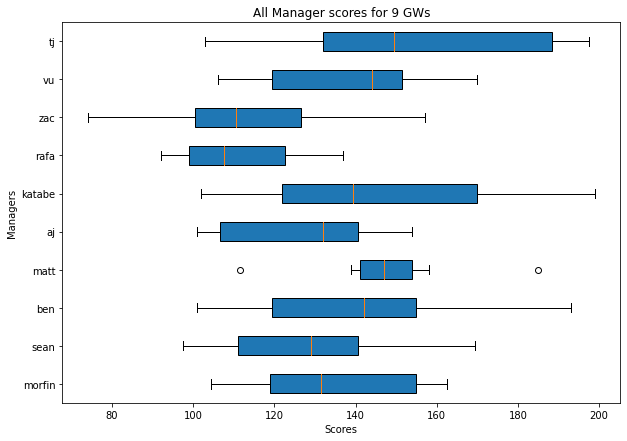

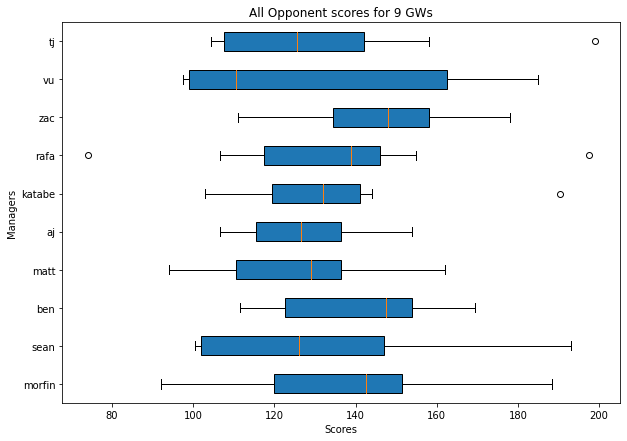

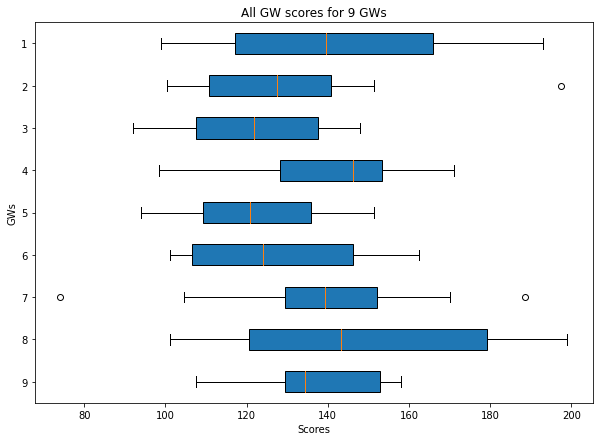

In [3]:
print(db.get_season(), "Scores")

if(show_plots):
    score_plots.plot_manager_scores(db)
    score_plots.plot_opponent_scores(db)
    score_plots.plot_gw_scores(db)

2025 Performances


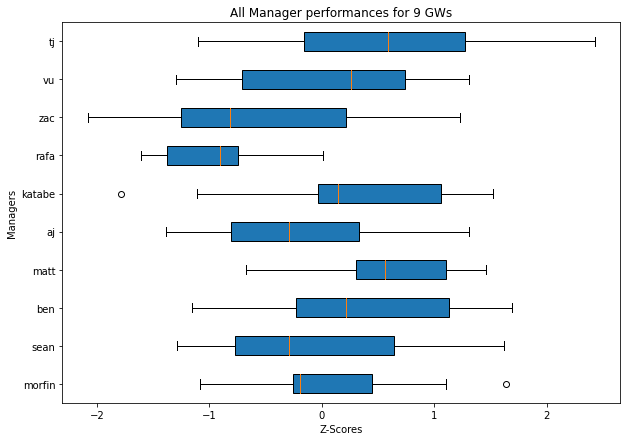

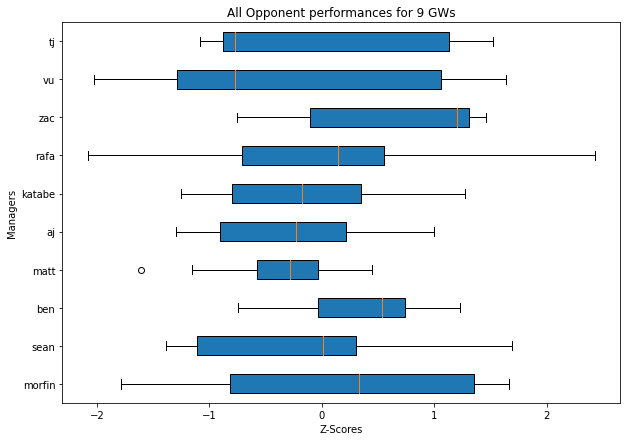

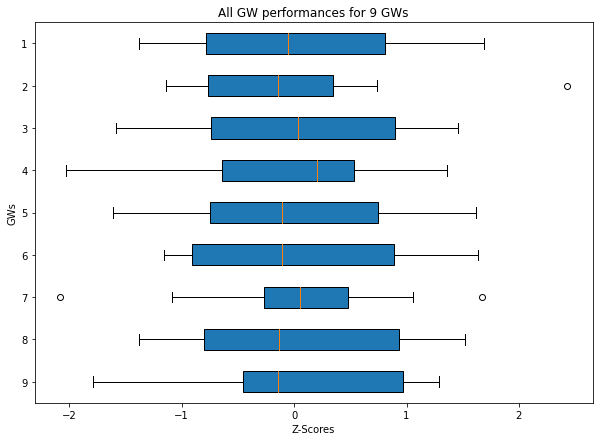

In [4]:
print(db.get_season(), "Performances")

if(show_plots):
    performance_plots.plot_manager_performances(db)
    performance_plots.plot_opponent_performances(db)
    performance_plots.plot_gw_performances(db)

2025 Roster Contributions
+---------+---------------------------------+----------------+--------------+---------------+---------------+
| Manager | Most Impactful Player (Drafted) | % Contribution | Total Points | Total Minutes | Points per 90 |
+---------+---------------------------------+----------------+--------------+---------------+---------------+
|  morfin |         Nick Pope (NEW)         |     12.86      |    156.5     |      810      |     17.39     |
|   sean  |       Mohammed Kudus (TOT)      |     13.07      |    152.5     |      784      |     17.51     |
|   ben   |       Erling Haaland (MCI)      |      15.1      |    191.5     |      773      |      22.3     |
|   matt  |        Bryan Mbeumo (MUN)       |     10.29      |    136.5     |      774      |     15.87     |
|    aj   |      Antoine Semenyo (BOU)      |     15.71      |    179.0     |      808      |     19.94     |
|  katabe |         Marc Guehi (CRY)        |     11.98      |    155.0     |      720      | 

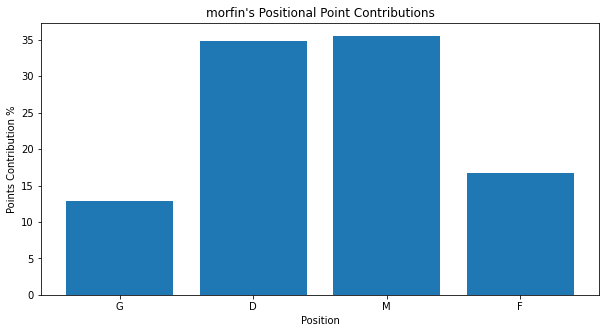

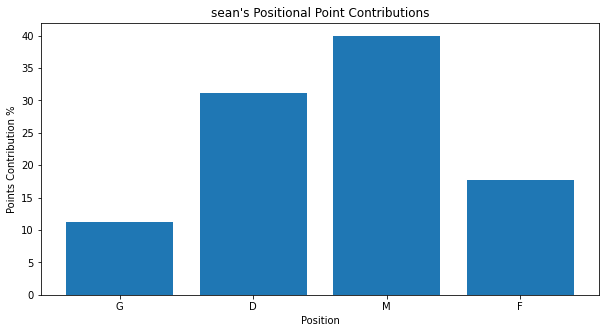

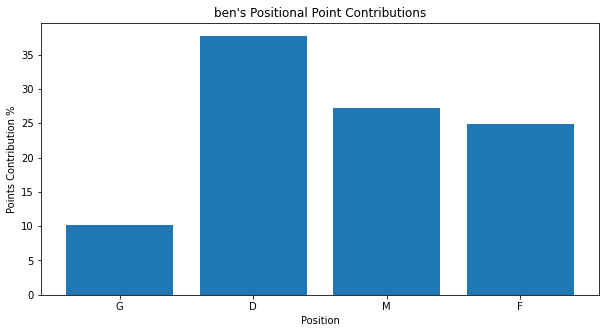

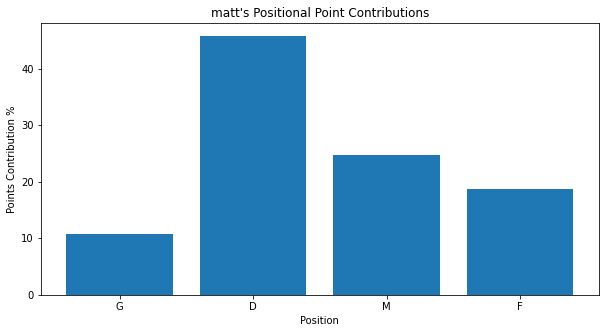

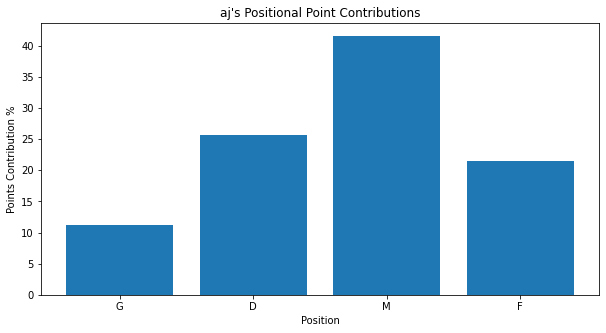

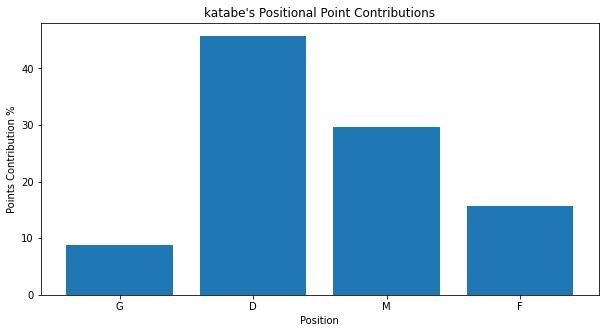

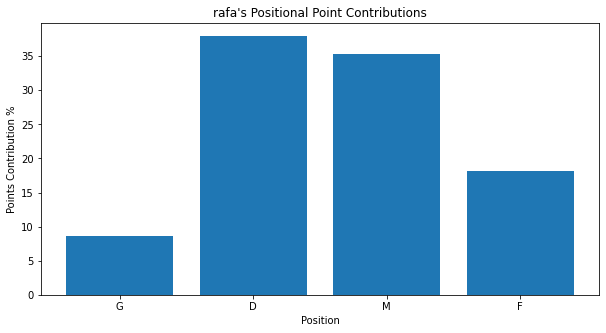

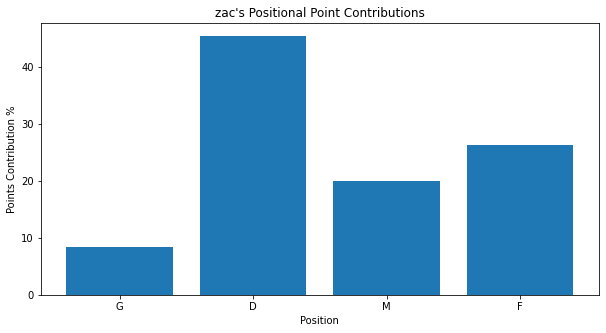

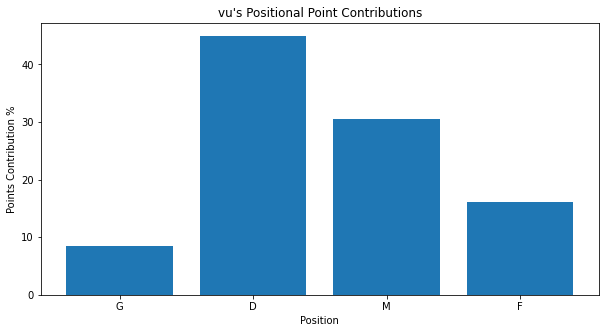

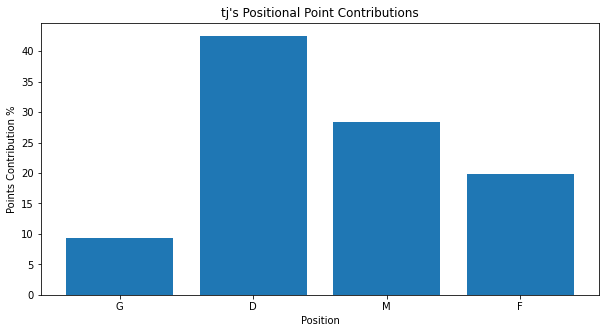

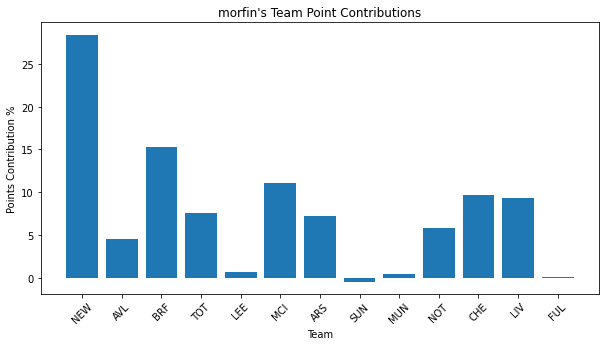

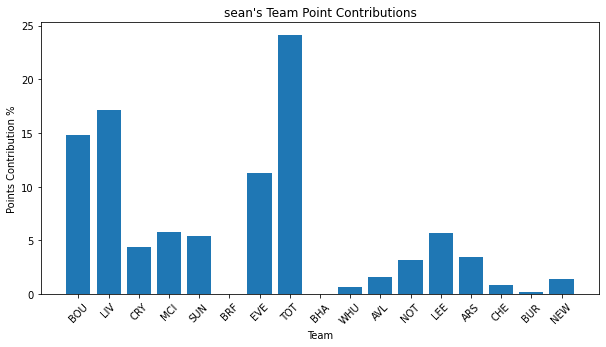

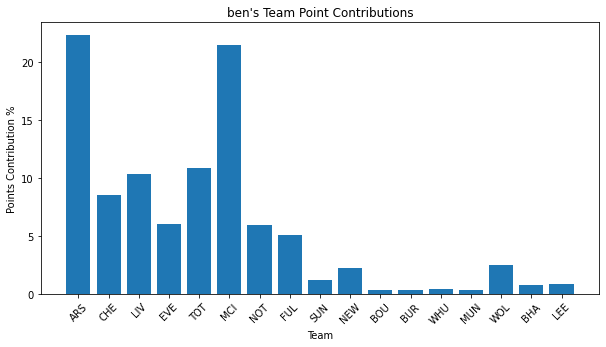

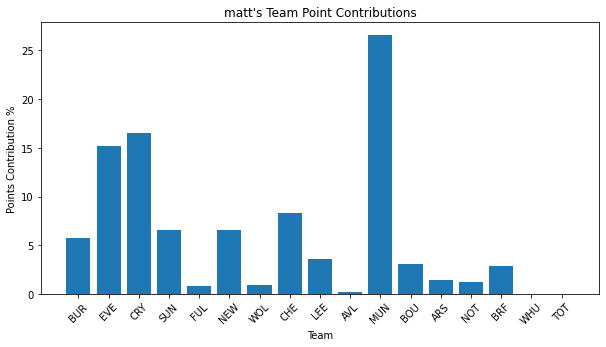

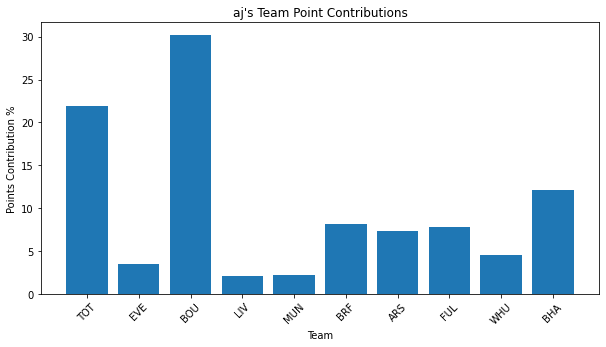

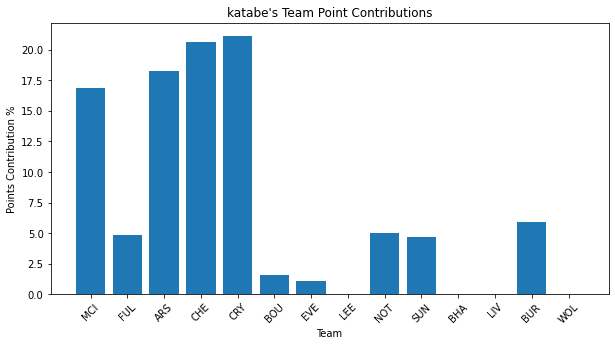

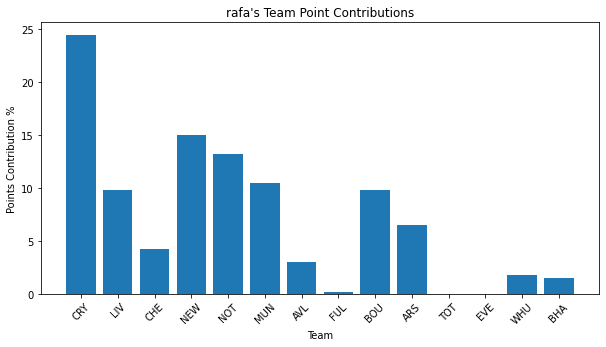

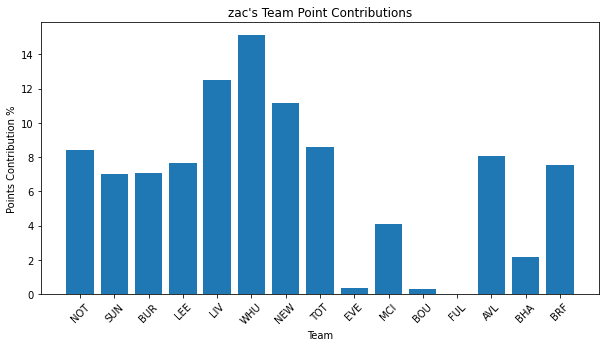

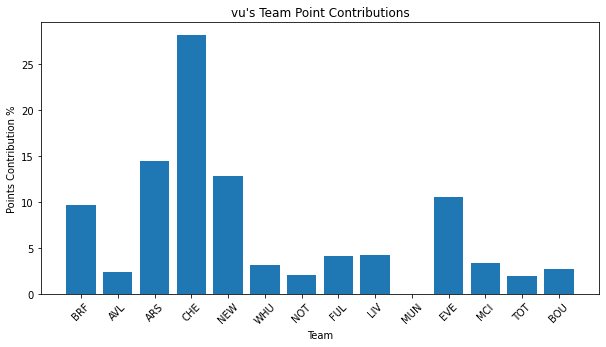

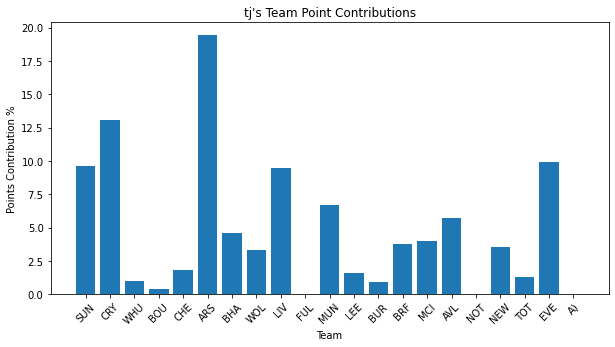

In [5]:
print(db.get_season(), "Roster Contributions")

if(show_charts):
    roster_charts.chart_roster_contributions_for_players(db, True)
    roster_charts.chart_roster_contributions_for_players(db, False)
    roster_charts.chart_roster_contributions_for_top_teams(db)
    roster_charts.chart_roster_contributions_for_teams(db)
    roster_charts.chart_roster_contributions_for_positions(db)

if(show_plots):
    roster_plots.plot_roster_scores_by_position(db)
    roster_plots.plot_roster_scores_by_team(db)

In [6]:
print(db.get_season(), "Positional Contributions")
# Chart the contributions for the season
roster_charts.chart_postitional_contributions(db)

2025 Positional Contributions
+----------+----------------+--------------+
| Position | % Contribution | Total Points |
+----------+----------------+--------------+
|    D     |     39.36      |    4751.5    |
|    M     |     31.15      |    3759.5    |
|    F     |     19.48      |    2351.5    |
|    G     |     10.01      |    1208.0    |
+----------+----------------+--------------+


In [7]:
print(db.get_season(), "Team Contributions")
# Chart the contributions for the season
roster_charts.chart_team_contributions(db)

2025 Team Contributions
+------+----------------+--------------+
| Team | % Contribution | Total Points |
+------+----------------+--------------+
| ARS  |     10.48      |    1265.0    |
| CHE  |      8.55      |    1032.0    |
| CRY  |      8.04      |    970.5     |
| NEW  |      7.9       |    954.0     |
| TOT  |      7.39      |    892.5     |
| LIV  |      7.29      |    879.5     |
| MCI  |      6.9       |    832.5     |
| EVE  |      6.09      |    735.0     |
| BOU  |      6.0       |    724.5     |
| MUN  |      4.85      |    586.0     |
| BRF  |      4.7       |    567.5     |
| NOT  |      4.24      |    511.5     |
| SUN  |      3.52      |    425.0     |
| AVL  |      2.49      |    300.5     |
| WHU  |      2.42      |    292.5     |
| FUL  |      2.35      |    283.5     |
| BHA  |      2.07      |    250.0     |
| BUR  |      2.03      |    244.5     |
| LEE  |      1.94      |    234.5     |
| WOL  |      0.74      |     89.5     |
|  A)  |      0.0       |     0.0

In [8]:
print(db.get_season(), "Drafts")

if(show_charts):
    draft_charts.chart_draft_impacts(db)

2025 Drafts
+----------+------------+-----------------------------------------------+--------------+------------------+
| Drafter  |  Position  |                      Name                     | Total Points | Traded / Dropped |
+----------+------------+-----------------------------------------------+--------------+------------------+
|          |            |                                               |              |                  |
| Round 1  | ---------- |                   ----------                  |  ----------  |    ----------    |
|          |            |                                               |              |                  |
|  morfin  |     F      |                 Mohamed Salah                 |    114.0     |      False       |
|   sean   |     M      |                  Cole Palmer                  |     10.0     |      False       |
|   ben    |     F      |                 Erling Haaland                |    191.5     |      False       |
|   matt   |    

2025 Activity


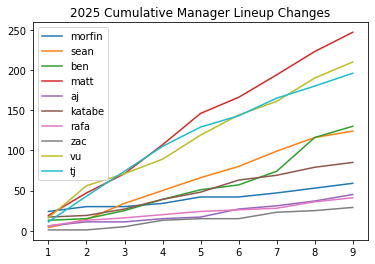

In [9]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    for name in managers:
        
        manager_lineup_changes = db.get_manager_activity_reader(name).get_lineup_changes()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Lineup Changes');

2025 Activity


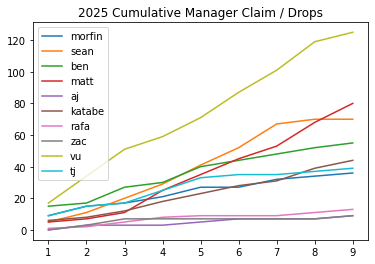

In [10]:
print(db.get_season(), "Activity")
# Plot the manager activity for the season

import pandas as pd

number_of_gws = db.get_number_of_gws()
managers = db.get_managers()
manager_activity = dict()
for name in managers:
    manager_activity[name] = dict()
    
x_axis = list()
for gw_index in range(number_of_gws):
    gw = gw_index + 1
    x_axis.append(gw)
    
    for name in managers:
        manager_lineup_changes = db.get_manager_activity_reader(name).get_claims_drops()
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
        
        manager_lineup_changes_for_gw = 0
        if(gw in manager_lineup_changes.keys()):
            manager_lineup_changes_for_gw = len(manager_lineup_changes[gw])
            
        if(gw > 1):
            prev_manager_lineup_changes_for_gw = manager_activity[name][gw - 1]
            manager_activity[name][gw] = manager_lineup_changes_for_gw + prev_manager_lineup_changes_for_gw
        else:
            manager_activity[name][gw] = manager_lineup_changes_for_gw
            
        # manager_activity[name][gw] = manager_lineup_changes_for_gw
        
    
df = pd.DataFrame(data=manager_activity)
df.head()    
df.plot(title = db.get_season() + ' Cumulative Manager Claim / Drops');